In [3]:
#the following code is to implement a simple steganographic algorithm which will encode a text message into an image
#the algorithm first converts the message into binary string an then encode the message bit by bit into the
#the least significant bits of the image, sequentially, the message will be encoded in one of the three (RGB) channel,
#the top layer/channel first and then moving on to the next channel if memory is required.
#In the following code the "key" which is refferd to the length of the binary string of the message, is required as
#it tells the decrypter how many pixel to look for starting from the upper left corner.

#As a simple improvement we may encode the length of the message (key) in the first few pixels itself, so decrypter
#will be able to infer how many pixels to look for and only requires an encoded image as input.

In [4]:
using Images

In [2]:
#the function to convert the message in a binary string
function msg2bin(msg)
    bs=""
    l = length(msg)
    for i= 1:l
        bs = bs*bin(msg[i],8)
    end
    return bs
end

msg2bin (generic function with 1 method)

In [1]:
#encoder will take the message binary string and encode it bit by bit in an image
using Images
function encoder(bs)
    img = load("image.jpg")
    intImg = raw(img)
    row = size(intImg)[2]
    col = size(intImg)[3]
    #for this simple algorithm to work we will assume that
    #the length of message bit string is smaller than the number 
    #of pixel in one layer
    rc = row*col
    for i=1:length(bs)
        s=convert(Vector{Char},bits(intImg[1,Int(round(i/rc))+1,i%rc]))
        s[8] = bs[i]
        s=convert(String, s)
        intImg[1,Int(round(i/rc)+1),i%rc] = parse(UInt8,s,2)
    end
    #At this point intImg has the message embedded in it
    return intImg
end  

encoder (generic function with 1 method)

In [9]:
#the decrypter
#this will be at the recievers end and expects the input of an image
#the ouput is expected to be a string "the message"
function decrypter(recvImg, len)
    recvImg = raw(recvImg)
    row = size(recvImg)[2]
    col = size(recvImg)[3]
    rc = row*col
    s = Vector{Char}(len)
    for i=1:len
        s[i] = bits(recvImg[1,Int(round(i/rc)+1),i%rc])[8]
    end
    s = convert(String,s)
    outmsg=Vector{Char}(Int(length(s)/8))
    for i=1:8:length(s)
        outmsg[Int(round(i/8)+1)]=(Char(parse(Int,s[i:i+7],2)))
    end
    return convert(String,outmsg)
end

decrypter (generic function with 1 method)

In [6]:
bs=msg2bin("This is julia tring steganography")
out = encoder(bs);

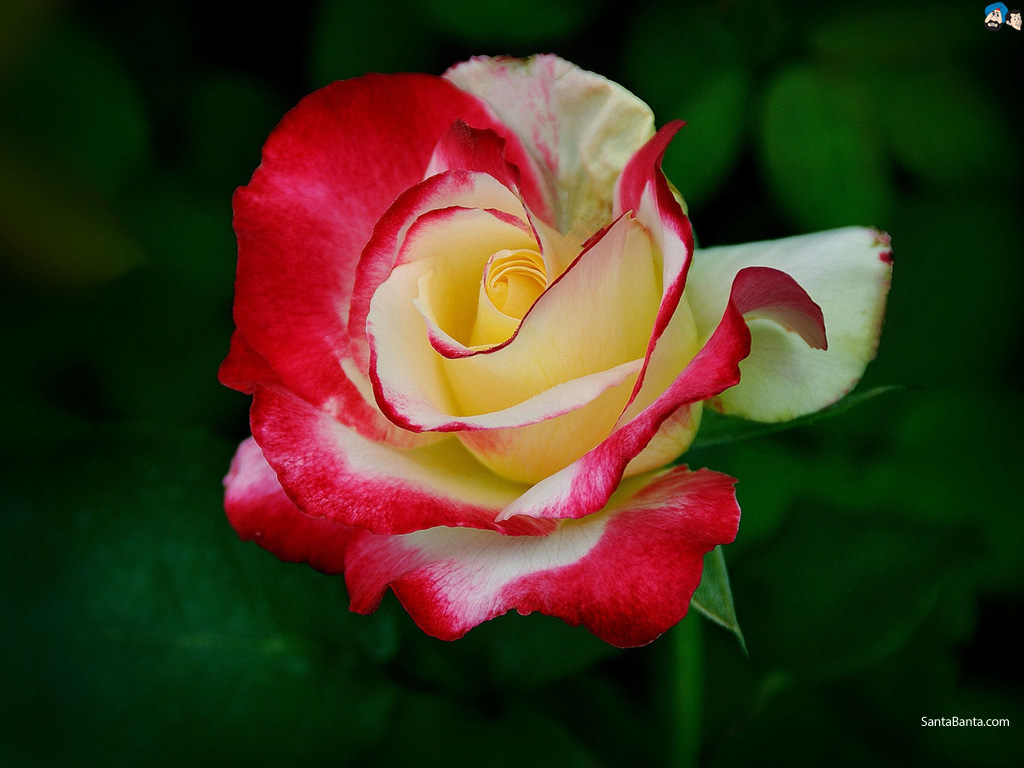

In [7]:
colorim(out)

In [10]:
recieved_msg = decrypter(out, length(bs))

"This is julia tring steganography"

In [11]:
length(bs)

264